In [24]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

In [25]:
data = pd.DataFrame({
    'VarNorm1': np.random.normal(loc=3, scale=7, size=20),
    'VarNorm2': np.random.normal(loc=7, scale=3, size=20),
    'VarUnif': np.random.uniform(size=20),
    'VarGamma': np.random.gamma(shape=7, size=20),
    'VarBinom': np.random.binomial(n=24, p=0.7, size=20),
    'VarStand_norm': np.random.standard_normal(size=20)
})
data

,VarNorm1,VarNorm2,VarUnif,VarGamma,VarBinom,VarStand_norm
0,2.110098,8.013937,0.534957,11.066720,16,-0.784407
1,11.743251,4.520520,0.506683,5.648369,17,-1.457722
2,3.169959,3.216372,0.420022,6.858261,11,-1.612421
3,8.819557,8.058211,0.637440,9.197090,14,-0.665739
4,2.763928,8.614778,0.517024,11.036254,19,-1.117229
5,6.699165,8.934568,0.340945,6.379199,16,0.740105
6,-10.414088,8.129643,0.763624,4.040834,18,0.406033
7,4.352466,3.638572,0.051066,6.728311,17,1.074913
8,2.073847,3.615469,0.494199,10.675138,20,-0.121539
9,0.290648,5.352772,0.490005,5.787549,18,-0.577677


In [26]:
data = pd.DataFrame({key: sorted(values) for key, values in data.transpose().iterrows()})

In [27]:
def FSum (arr,n):
    x = 0
    for i in range(n):
        x += arr[i]
    return x/n
Val_Sum_1 = {i: FSum(data[i], 20) for i in data}

In [28]:
def SQuare(arr, n, x):
    s = 0
    for i in range(n):
        s += ((arr[i] - x)**2)
    return s
S_s = {i: SQuare(data[i], 20, Val_Sum_1[i]) for i in data}

In [29]:
a= [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140] 
#W = 1/S^2 * sum(a_i) * (x_n_i - x_i)
def W (arr, n, S_s2):
    
    tmp = 0
    for i in range(n//2):
        tmp +=(a[i] * (arr[(n-1)-i] - arr[i]))
    return tmp**2 /S_s2

W_pr = {i: W(data[i], 20, S_s[i]) for i in data}
W_v = {i: sts.shapiro(data[i]) for i in data}

print("Практичне значення: W_pr = ", W_pr)
print(' ')
print("За вбудованою формулою: W_v = ", W_v)

Практичне значення: W_pr =  {'VarNorm1': 0.8401170961448688, 'VarNorm2': 0.941449301000765, 'VarUnif': 0.9736261945219911, 'VarGamma': 0.9101878686834997, 'VarBinom': 0.9532552083210601, 'VarStand_norm': 0.964863693888497}
 
За вбудованою формулою: W_v =  {'VarNorm1': (0.8403058648109436, 0.003682830138131976), 'VarNorm2': (0.9415179491043091, 0.2561156451702118), 'VarUnif': (0.9734055995941162, 0.8245247602462769), 'VarGamma': (0.9102708697319031, 0.06449729949235916), 'VarBinom': (0.9532463550567627, 0.419066846370697), 'VarStand_norm': (0.9647859334945679, 0.643174409866333)}


In [30]:
colum_n = ['Variable', 'Statistics', 'Distribution']
new_data = pd.DataFrame(columns = colum_n)
new_data

,Variable,Statistics,Distribution


In [31]:
new_data["Variable"] = data.keys()
new_data

,Variable,Statistics,Distribution
0,VarNorm1,NaN,NaN
1,VarNorm2,NaN,NaN
2,VarUnif,NaN,NaN
3,VarGamma,NaN,NaN
4,VarBinom,NaN,NaN
5,VarStand_norm,NaN,NaN


In [32]:
new_data["Distribution"] = [('normal' if 'Normal' in dist else 'non-normal')
                          for dist in new_data["Variable"]]
new_data

,Variable,Statistics,Distribution
0,VarNorm1,NaN,non-normal
1,VarNorm2,NaN,non-normal
2,VarUnif,NaN,non-normal
3,VarGamma,NaN,non-normal
4,VarBinom,NaN,non-normal
5,VarStand_norm,NaN,non-normal


In [33]:
for i in range (new_data.shape[0]):
    Var = new_data["Variable"][i]
    if 'normal' in Var:
        new_data["Statistics"][i] = f".{data[Var].mean()} [ {data[Var].std()} ]"
new_data

,Variable,Statistics,Distribution
0,VarNorm1,NaN,non-normal
1,VarNorm2,NaN,non-normal
2,VarUnif,NaN,non-normal
3,VarGamma,NaN,non-normal
4,VarBinom,NaN,non-normal
5,VarStand_norm,NaN,non-normal


In [34]:
for i in range (new_data.shape[0]):
    non_normal = new_data["Variable"][i]
    if 'normal'not in non_normal:
        new_data["Statistics"][i] = f".{data[non_normal].median()} \
        [{data[non_normal].quantile(0.25)}; {data[non_normal].quantile(0.75)}]"

new_data

,Variable,Statistics,Distribution
0,VarNorm1,.2.966943809203994 [1.598363495335815;...,non-normal
1,VarNorm2,.5.821335279562159 [3.8518081733936906...,non-normal
2,VarUnif,.0.5118532623563522 [0.432563126845604...,non-normal
3,VarGamma,.6.793285573555847 [5.882735292999936;...,non-normal
4,VarBinom,.16.5 [14.0; 18.0],non-normal
5,VarStand_norm,.-0.1679693026736031 [-0.6954060349345...,non-normal


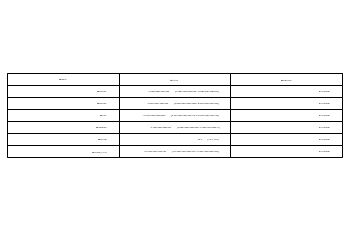

In [35]:
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(new_data)):
    cell_text.append(new_data.iloc[row])

ax.table(cellText=cell_text, colLabels=new_data.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()